In [32]:
import numpy as np 
from qiskit import QuantumRegister, ClassicalRegister,QuantumCircuit, transpile, Aer
from qiskit.providers.aer import QasmSimulator
from Hamming import *
import qiskit
%matplotlib inline
from random import randint

In [146]:
N = 4
circuit=HammingCircuit(N, ClassicalRegisters=True)

circuit.h(0)
circuit.cx(0,1)
circuit.x(1)
circuit.cx(0,2)
#circuit.x(2)
#circuit.x(3)

circuit.append(Hamming_encode(N-1), list(range(2**N)))


#[circuit.x(randint(0,2**(N-1))) for i in range(10)]
[circuit.z(randint(0,2**(N-1))) for i in range(20)]


circuit.append(Hamming_decode(N-1), list(range(2**N + 2*N - 1)))

circuit.measure(list(range(N)),list(range(N)))
print(circuit.draw())

         ┌───┐               ┌───────────────────┐┌───┐┌───┐┌───┐          »
p0000_0: ┤ H ├──■─────────■──┤0                  ├┤ Z ├┤ Z ├┤ Z ├──────────»
         └───┘┌─┴─┐┌───┐  │  │                   │├───┤├───┤├───┤┌───┐     »
p0001_0: ─────┤ X ├┤ X ├──┼──┤1                  ├┤ Z ├┤ Z ├┤ Z ├┤ Z ├─────»
              └───┘└───┘┌─┴─┐│                   │└───┘└───┘└───┘└───┘     »
p0010_0: ───────────────┤ X ├┤2                  ├─────────────────────────»
                        └───┘│                   │┌───┐┌───┐               »
s0011_0: ────────────────────┤3                  ├┤ Z ├┤ Z ├───────────────»
                             │                   │└───┘└───┘               »
p0100_0: ────────────────────┤4                  ├─────────────────────────»
                             │                   │┌───┐┌───┐┌───┐┌───┐┌───┐»
s0101_0: ────────────────────┤5                  ├┤ Z ├┤ Z ├┤ Z ├┤ Z ├┤ Z ├»
                             │                   │├───┤├───┤├───┤└───┘└───┘»

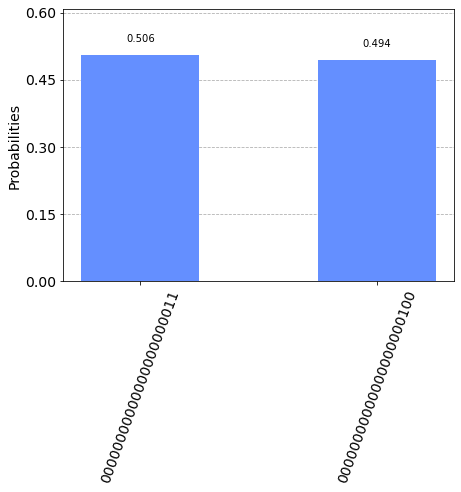

In [147]:
simulator = Aer.get_backend("qasm_simulator")
result = qiskit.execute(circuit, backend = simulator, shots=10000).result()

from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))